# 用 RNN 做電影評論的「情意分析」, 究竟是「正評」還是「負評」。

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 讀入 IMDB 電影數據庫影評的部份

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# 送入神經網路的輸入處理

In [5]:
from keras.preprocessing import sequence

In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

# 打造 RNN, 選用 LSTM

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
import keras.callbacks

In [8]:
# 步驟
# 01 先將 10000 維的文字壓到 N 維
# 02 然後用 K 個 LSTM 神經元做隱藏層
# 03 最後一個 output, 直接用 sigmoid 送出

In [19]:
model = Sequential()

N = 32 # 設定文字要壓到 N 維
K = 100 # 設定 LSTM 有 K 個神經元

model.add(Embedding(10000, N)) # 01 先將 10000 維的文字壓到 N 維

model.add(Dropout(0.5)) # Dropout 在訓練中每次更新時， 將輸入單元的按比率隨機設置為 0，有助於防止過擬合

model.add(LSTM(K)) # 02 然後用 K 個 LSTM 神經元做隱藏層(LSTM 層, 做 K 個 LSTM Cells)

model.add(Dense(1, activation='sigmoid')) # 03 最後一個 output, 直接用 sigmoid 送出


# 組裝

In [20]:
# 用 binary_crossentropy 做 loss function, 使用 Adam 學習法
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# 檢視我們的神經網路
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________


# 訓練

In [22]:
# Early Stopping in Keras, Keras supports the early stopping of training via a callback called EarlyStopping.
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)

# 訓練神經網路
model_fit = model.fit(x_train, y_train, 
                      batch_size = 100, epochs = 5, verbose = 1, 
                      validation_data = (x_test, y_test), callbacks=[es])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 170s 7ms/step - loss: 0.4905 - acc: 0.7569 - val_loss: 0.3184 - val_acc: 0.8684
Epoch 2/5
25000/25000 [==============================] - 166s 7ms/step - loss: 0.2720 - acc: 0.8910 - val_loss: 0.2935 - val_acc: 0.8798
Epoch 3/5
25000/25000 [==============================] - 167s 7ms/step - loss: 0.2178 - acc: 0.9161 - val_loss: 0.3087 - val_acc: 0.8762


25000/25000 [==============================] - 46s 2ms/step
測試資料的 loss = 0.30865366317272186
測試資正確率 = 0.87624


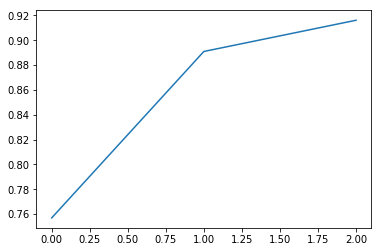

In [23]:
# 檢視準確率
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss = {score[0]}')
print(f'測試資正確率 = {score[1]}')

plt.plot(model_fit.history["acc"])

In [24]:
# 訓練好的神經網路存起來!
model_json = model.to_json()
open('imdb_model_arch.json',
     'w').write(model_json)
model.save_weights('imdb_model_weights.h5')